# Predicting AstraZeneca Stock Prices
### Melania Czobit


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install -q yfinance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

     |████████████████████████████████| 6.3 MB 7.8 MB/s 


**Importing stock data**

The AZN stock price data will be obtained from Yahoo finance. 

In [ ]:
df = yf.download('AZN','2012-12-31','2020-01-01')

[*********************100%***********************]  1 of 1 completed


**Data Preparation**

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-12-31,23.375000,23.660000,23.360001,23.635000,16.594944,1916600
2013-01-02,24.080000,24.120001,23.980000,24.120001,16.935476,2812000
2013-01-03,24.020000,24.115000,23.980000,24.075001,16.903885,1941200
2013-01-04,23.959999,24.120001,23.959999,24.075001,16.903885,1854800
2013-01-07,23.995001,24.100000,23.975000,24.055000,16.889841,1932200


The dataset is missing a few days - weekends and holidays are not in the dataset. These values will be added into the dataset by forward-filling. 

In [ ]:
df = df.resample('D').ffill()
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-12-31,23.375000,23.660000,23.360001,23.635000,16.594944,1916600
2013-01-01,23.375000,23.660000,23.360001,23.635000,16.594944,1916600
2013-01-02,24.080000,24.120001,23.980000,24.120001,16.935476,2812000
2013-01-03,24.020000,24.115000,23.980000,24.075001,16.903885,1941200
2013-01-04,23.959999,24.120001,23.959999,24.075001,16.903885,1854800
2013-01-05,23.959999,24.120001,23.959999,24.075001,16.903885,1854800
2013-01-06,23.959999,24.120001,23.959999,24.075001,16.903885,1854800
2013-01-07,23.995001,24.100000,23.975000,24.055000,16.889841,1932200
2013-01-08,23.875000,24.110001,23.870001,24.075001,16.903885,1853800


The first row, with date 2012-12-31, will be omitted. It was required to forward-fill the row for 2013-01-01. 

In [ ]:
df = df.iloc[1:]
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-01,23.375000,23.660000,23.360001,23.635000,16.594944,1916600
2013-01-02,24.080000,24.120001,23.980000,24.120001,16.935476,2812000
2013-01-03,24.020000,24.115000,23.980000,24.075001,16.903885,1941200
2013-01-04,23.959999,24.120001,23.959999,24.075001,16.903885,1854800
2013-01-05,23.959999,24.120001,23.959999,24.075001,16.903885,1854800
...,...,...,...,...,...,...
2019-12-27,50.570000,50.660000,50.299999,50.439999,48.110725,1636200
2019-12-28,50.570000,50.660000,50.299999,50.439999,48.110725,1636200
2019-12-29,50.570000,50.660000,50.299999,50.439999,48.110725,1636200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2556 entries, 2013-01-01 to 2019-12-31
Freq: D
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2556 non-null   float64
 1   High       2556 non-null   float64
 2   Low        2556 non-null   float64
 3   Close      2556 non-null   float64
 4   Adj Close  2556 non-null   float64
 5   Volume     2556 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 139.8 KB


The descriptive statistics of the full dataset is shown below. 

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2.556000e+03
mean,33.590059,33.813324,33.389468,33.611375,28.451753,4.379344e+06
std,5.515301,5.548125,5.467639,5.500987,6.646207,3.445372e+06
min,22.370001,22.385000,22.230000,22.334999,16.336739,7.558000e+05
25%,29.590000,29.760000,29.400000,29.660000,24.663406,2.536600e+06
50%,33.737501,34.032499,33.594999,33.830002,27.486526,3.574900e+06
75%,36.803749,36.990002,36.541250,36.810001,31.903486,5.019200e+06
max,50.830002,51.230000,50.330002,50.459999,48.129799,5.746580e+07


In [ ]:
df.shape

(2556, 6)

In [ ]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

The prices for the whole dataset were plotted to visualize the change throughout time.

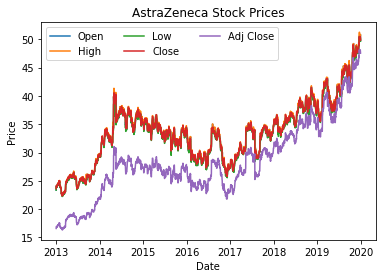

In [ ]:
plt.plot(df['Open'], label='Open')
plt.plot(df['High'], label='High')
plt.plot(df['Low'], label='Low')
plt.plot(df['Close'], label='Close')
plt.plot(df['Adj Close'], label='Adj Close')
plt.legend(ncol=3)
plt.title('AstraZeneca Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

**Splitting into train and test set**

The data will be split into a train and test set.  The data preparation will be applied to the train set only to prevent leaking information from the test set.

In [ ]:
train = df.iloc[:-730,:]
test = df.iloc[-730:,:]

Creating a correlation matrix can give insight about the dataset.

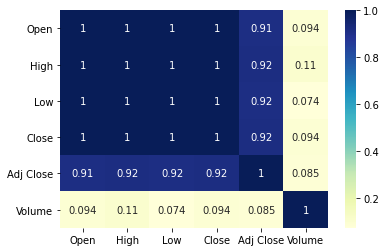

In [ ]:
corr_matrix=train.corr()
sns.heatmap(corr_matrix,cmap='YlGnBu',annot=True)

The correlation matrix above indicates that most of the attributes are highly correlated.

Text(0, 0.5, 'Price')

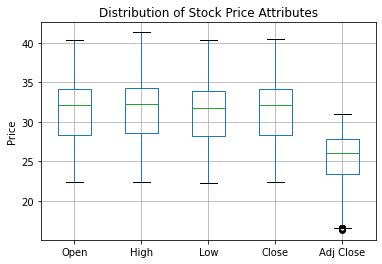

In [ ]:
boxplot1 = train.boxplot(column=['Open','High','Low','Close','Adj Close'])
plt.title('Distribution of Stock Price Attributes')
plt.ylabel('Price')

Text(0, 0.5, 'Number of Shares (e7)')

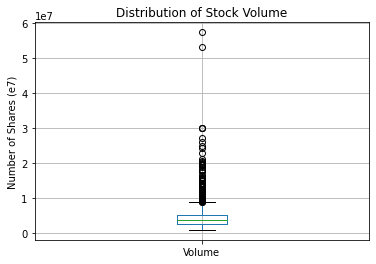

In [ ]:
boxplot2 = train.boxplot('Volume')
plt.title('Distribution of Stock Volume')
plt.ylabel("Number of Shares (e7)")

Next, a histogram for the Close price is visualized.

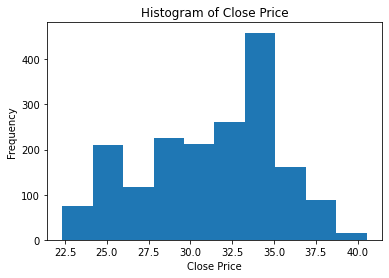

In [ ]:
plt.hist(train['Close'])
plt.title('Histogram of Close Price')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

The distribution of the Close price is skewed left.

**Testing for Stationarity**

In [ ]:
import statsmodels
from statsmodels.tsa.stattools import adfuller

In [ ]:
def test_stationarity(timeseries):

  results = adfuller(timeseries, autolag='AIC')
  print('Results of Augmented Dickey Fuller Test')
  print('Test Statistic: ' + str(results[0]))
  print('p-value: ' + str(results[1]))
  print('No. of lags used: ' + str(results[2]))
  print('Number of observations used: ' + str(results[3]))

  for key, value in results[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

  if results[1] <= 0.05:
    print ("Reject null hypothesis. Data is stationary.")
  else:
    print ("Fail to reject null hypothesis. Data is non-stationary.")

It is important to determine whether the data is stationary. We apply the test_stationarity function to the close price. 

In [ ]:
test_stationarity(train['Close'])

Results of Augmented Dickey Fuller Test
Test Statistic: -2.4546370846141765
p-value: 0.12690522366441254
No. of lags used: 7
Number of observations used: 1818
Critial Values:
   1%, -3.4339520666978056
Critial Values:
   5%, -2.8631311116872475
Critial Values:
   10%, -2.567617054512932
Fail to reject null hypothesis. Data is non-stationary


The close price is not stationary. Need to apply differencing and transformations to make the close price stationary. 

The close price will undergo the following transformations separately:

* Log transformation
* Square root transformation
* First degree differencing


In [ ]:
train['Close_log'] = np.log(train['Close'])
train['Close_sqrt'] = np.sqrt(train['Close'])
train['Close_diff'] = train['Close'].diff()

The transformations will be plotted to visually identify if the time-series data is stationary. 

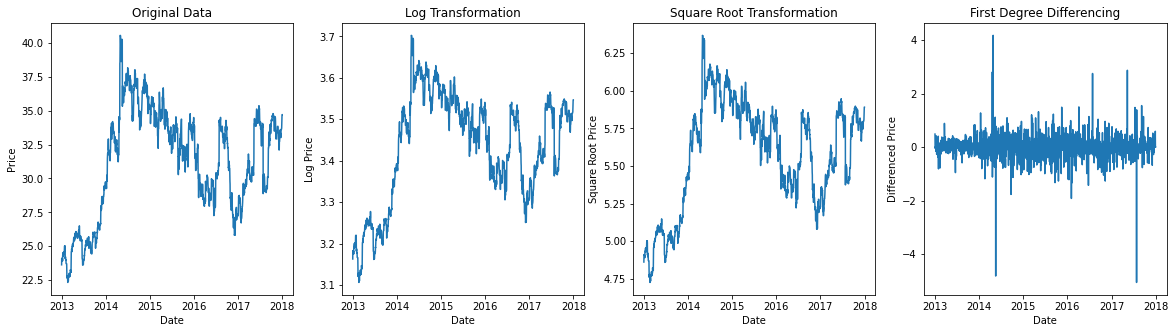

In [ ]:
figure, axis = plt.subplots(ncols=4, figsize = (20,5))
axis[0].plot(train["Close"])
axis[0].set_title("Original Data")
axis[0].set_xlabel("Date")
axis[0].set_ylabel("Price")

axis[1].plot(train["Close_log"])
axis[1].set_title("Log Transformation")
axis[1].set_xlabel("Date")
axis[1].set_ylabel("Log Price")

axis[2].plot(train["Close_sqrt"])
axis[2].set_title("Square Root Transformation")
axis[2].set_xlabel("Date")
axis[2].set_ylabel("Square Root Price")

axis[3].plot(train["Close_diff"])
axis[3].set_title("First Degree Differencing")
axis[3].set_xlabel("Date")
axis[3].set_ylabel("Differenced Price")

plt.show()

Visually, the dataset looks stationary following first degree differencing. By applying the Augmented Dickey-Fuller test, we can determine if the dataset is stationary. A p-value of less than 0.05 indicates the dataset is stationary. 

In [ ]:
train = train.dropna()

In [ ]:
test_stationarity(train['Close_diff'])

Results of Augmented Dickey Fuller Test
Test Statistic: -15.845059333521252
p-value: 9.593098574496171e-29
No. of lags used: 6
Number of observations used: 1818
Critial Values:
   1%, -3.4339520666978056
Critial Values:
   5%, -2.8631311116872475
Critial Values:
   10%, -2.567617054512932
Reject null hypothesis. Data is stationary


**Testing for autocorrelation**

In [ ]:
from statsmodels.graphics import tsaplots
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

Autocorrelation will be tested on the close price and the differenced close price for comparison. 

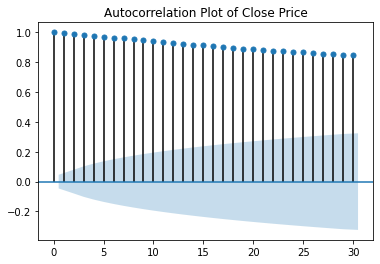

In [ ]:
plot_acf(train['Close'], lags=30, title='Autocorrelation Plot of Close Price');

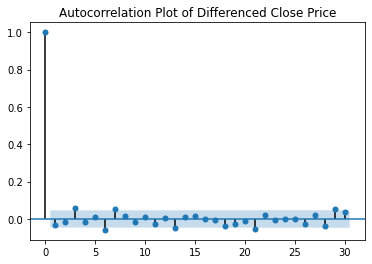

In [ ]:
plot_acf(train['Close_diff'], lags=30, title='Autocorrelation Plot of Differenced Close Price');

From the autocorrelation plot of the differenced close price, it is evident that the data is stationary. 

The partial autocorrelation plot for both the close and difference close price was visualized.

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

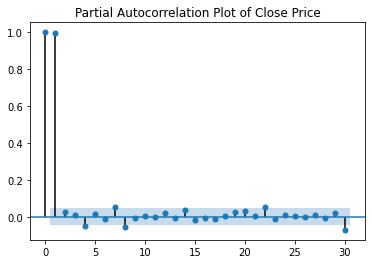

In [ ]:
plot_pacf(train['Close'], lags=30, title='Partial Autocorrelation Plot of Close Price');

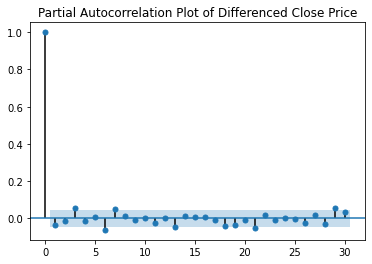

In [ ]:
plot_pacf(train['Close_diff'], lags=30, title='Partial Autocorrelation Plot of Differenced Close Price');

**Testing for Seasonality**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

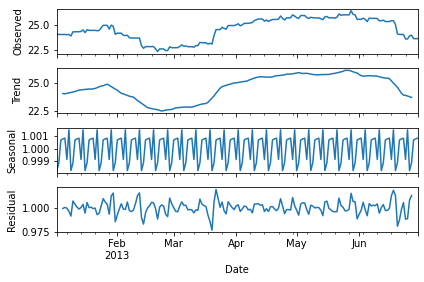

In [ ]:
output = seasonal_decompose(train['Close'][:180], model='multiplicative')
output.plot();

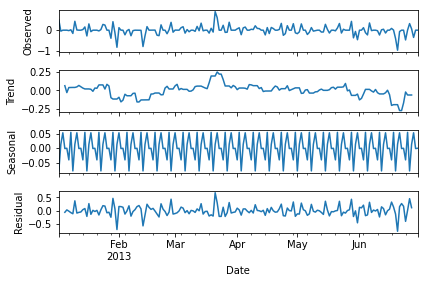

In [ ]:
decomposed = seasonal_decompose(train['Close_diff'][:180], model='additive')
decomposed.plot();

Prior to modeling, there are a few columns that will be dropped that will not be used to train the model.

In [ ]:
train_diff = train.drop(['Close_log','Close_sqrt','Close'],1)
train_diff.shape

(1825, 6)

In [ ]:
X_train = train_diff.drop('Close_diff', 1)
X_test = test.drop('Close',1)

y_train = train_diff['Close_diff'].values
y_test = test['Close'].values

**Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
model = LinearRegression().fit(X_train,y_train)

In [ ]:
y_prediction = model.predict(X_test)

In [ ]:
predictions_diff = pd.Series(y_prediction, copy=True)

print('Total no of predictions: ', len(predictions_diff))
predictions_diff.head()

Total no of predictions:  730


0    0.006298
1   -0.027571
2    0.073773
3   -0.052115
4    0.095105
dtype: float64

The cumulative sum (cumsum) function will be applied to the prediction to inverse the differencing applied to the train set. 

In [ ]:
predictions_diff_cumsum = predictions_diff.cumsum()
predictions_diff_cumsum.head()

0    0.006298
1   -0.021273
2    0.052500
3    0.000385
4    0.095490
dtype: float64

The values from predictions_diff_cumsum will be added to the last value in train['Close'] 

In [ ]:
last_price = train['Close'].iloc[-1] 
price_diff_rev = []

for i in predictions_diff_cumsum:
    close_pred = last_price + i
    price_diff_rev.append(close_pred)

In [ ]:
y_pred = np.array(price_diff_rev) 

The model will be evaluated with the R2, MAE, MSE and RMSE values. 

In [ ]:
print ("R2 of Linear Regresson:", r2_score(y_test,y_pred) )
print('MAE: ',metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 of Linear Regresson: 0.1366182995679459
MAE:  2.9853654767765403
MSE:  14.504837611080148
RMSE: 3.8085217094143164


The actual and predicted close price are plotted for comparison. 

Text(0, 0.5, 'Close Price')

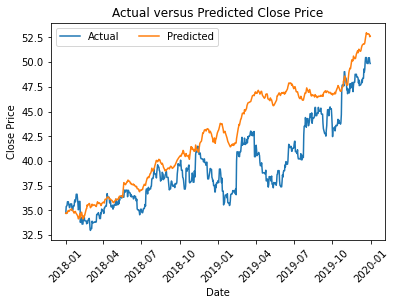

In [ ]:
forecast = pd.Series(y_pred, copy=True, index=test.index)
plt.plot(test['Close'], label='Actual')
plt.plot(forecast, label='Predicted')
plt.legend(ncol=2)
plt.xticks(rotation=45)
plt.title('Actual versus Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')

To determine if the best model was produced, feature selection will be completed to determine the attributes that best predict the Close price. Feature selection will be completed using backward elimination.

In [ ]:
X_train = np.append (arr=np.ones([X_train.shape[0],1]).astype(int), values = X_train, axis = 1)

In [ ]:
import statsmodels.regression.linear_model as sm
X_opt = [0,1,2,3,4,5]
regressor = sm.OLS(y_train, X_train[:,X_opt]).fit()
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     33.75
Date:                Sun, 25 Jul 2021   Prob (F-statistic):           4.71e-33
Time:                        14:40:26   Log-Likelihood:                -827.54
No. Observations:                1825   AIC:                             1667.
Df Residuals:                    1819   BIC:                             1700.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1222      0.074     -1.656      0.0

The feature with the highest p-value greater than our significance level of 0.05 will be removed. Feature 4, adjusted close, is removed. 

In [ ]:
X_opt = [0,1,2,3,5]
regressor = sm.OLS(y_train, X_train[:,X_opt]).fit()
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     42.10
Date:                Sun, 25 Jul 2021   Prob (F-statistic):           8.23e-34
Time:                        14:40:26   Log-Likelihood:                -827.74
No. Observations:                1825   AIC:                             1665.
Df Residuals:                    1820   BIC:                             1693.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1135      0.072     -1.566      0.1

Feature 5 (x4), volume, has a p-value greater than 0.05 and is removed. 

In [ ]:
X_opt = [0,1,2,3]
regressor = sm.OLS(y_train, X_train[:,X_opt]).fit()
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     55.59
Date:                Sun, 25 Jul 2021   Prob (F-statistic):           2.22e-34
Time:                        14:40:26   Log-Likelihood:                -828.54
No. Observations:                1825   AIC:                             1665.
Df Residuals:                    1821   BIC:                             1687.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1274      0.072     -1.779      0.0

There is one more feature to remove. The constant is removed. 

In [ ]:
X_opt = [1,2,3]
regressor = sm.OLS(y_train, X_train[:,X_opt]).fit()
print(regressor.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.083
Model:                            OLS   Adj. R-squared (uncentered):              0.081
Method:                 Least Squares   F-statistic:                              54.62
Date:                Sun, 25 Jul 2021   Prob (F-statistic):                    8.30e-34
Time:                        14:40:26   Log-Likelihood:                         -830.12
No. Observations:                1825   AIC:                                      1666.
Df Residuals:                    1822   BIC:                                      1683.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The best linear regression model has features Open, High and Low. The linear regression model is run with these three independent variables. 

In [ ]:
X_train2 = train_diff.drop(['Adj Close','Volume','Close_diff'],1)
X_test2 = test.drop(['Adj Close', 'Volume','Close'],1)

model = LinearRegression().fit(X_train2,y_train)
y_prediction2 = model.predict(X_test2)
predictions_diff2 = pd.Series(y_prediction2, copy=True)
predictions_diff_cumsum2 = predictions_diff2.cumsum()
last_price = train['Close'].iloc[-1] 
price_rev = []

for i in predictions_diff_cumsum2:
    close_pred = last_price + i
    price_rev.append(close_pred)

y_pred2 = np.array(price_rev) 

print ("R2 of Linear Regresson:", r2_score(y_test,y_pred2) )
print('MAE: ',metrics.mean_absolute_error(y_test, y_pred2))
print('MSE: ',metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

R2 of Linear Regresson: -3.7716214664376597
MAE:  7.6303994082376985
MSE:  80.16337904496639
RMSE: 8.953400417995745


In [ ]:
X_train3 = train_diff.drop(['Low','Volume','Adj Close','Close_diff'], 1)
X_test3 = test.drop(['Low','Volume','Adj Close','Close'],1)

model = LinearRegression().fit(X_train3,y_train)
y_prediction3 = model.predict(X_test3)
predictions_diff3 = pd.Series(y_prediction3, copy=True)
predictions_diff_cumsum3 = predictions_diff3.cumsum()
last_price = train['Close'].iloc[-1] 
price_diff_rev = []

for i in predictions_diff_cumsum3:
    close_pred = last_price + i
    price_diff_rev.append(close_pred)

y_pred3 = np.array(price_diff_rev) 

print ("R2 of Linear Regresson:", r2_score(y_test,y_pred3))
print('MAE: ',metrics.mean_absolute_error(y_test, y_pred3))
print('MSE: ',metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

R2 of Linear Regresson: -0.013380156620055761
MAE:  3.1252636298390915
MSE:  17.02481602599318
RMSE: 4.12611391335639


In [ ]:
X_train4 = train_diff.drop(['High','Low','Adj Close','Volume','Close_diff'], 1)
X_test4 = test.drop(['High','Low','Adj Close','Volume','Close'],1)

model = LinearRegression().fit(X_train4,y_train)
y_prediction4 = model.predict(X_test4)
predictions_diff4 = pd.Series(y_prediction4, copy=True)
predictions_diff_cumsum4 = predictions_diff4.cumsum()
last_price = train['Close'].iloc[-1] 
price_diff_rev = []

for i in predictions_diff_cumsum4:
    close_pred = last_price + i
    price_diff_rev.append(close_pred)

y_pred4 = np.array(price_diff_rev) 

print ("R2 of Linear Regresson:", r2_score(y_test,y_pred4))
print('MAE: ',metrics.mean_absolute_error(y_test, y_pred4))
print('MSE: ',metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

R2 of Linear Regresson: 0.775335140697748
MAE:  1.4646497267504153
MSE:  3.7743761530555955
RMSE: 1.9427753738030538


To get the equation of the simple linear regression, the following values are displayed. 

In [ ]:
print('Intercept: ', model.intercept_)
print('Slope: ', model.coef_)

Intercept:  -0.04104701797373313
Slope:  [0.00150992]


The equation of the simple linear regression is y = -0.041 + 0.0015 x1

From the four linear regression models, the best performing model only includes the open price in X_train and X_test.

Text(0, 0.5, 'Close Price')

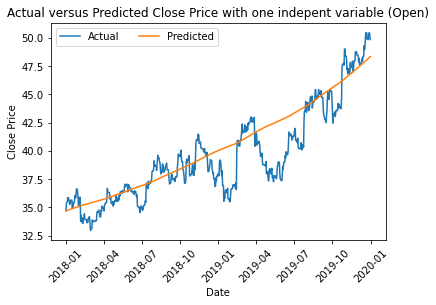

In [ ]:
predicted4 = pd.Series(y_pred4, copy=True, index=test.index)
plt.plot(test['Close'], label='Actual')
plt.plot(predicted4, label='Predicted')
plt.legend(ncol=2)
plt.xticks(rotation=45)
plt.title('Actual versus Predicted Close Price with one indepent variable (Open)')
plt.xlabel('Date')
plt.ylabel('Close Price')

**KNN Regression**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
mse_dict = {}
rmse = []

for k in range(1,100,2):
  Knn=KNeighborsRegressor(n_neighbors=k, metric='euclidean')
  Knn.fit(X_train,y_train)
  knn_y_prediction = Knn.predict(X_test)

  knn_predictions_diff = pd.Series(knn_y_prediction, copy=True)
  knn_predictions_diff_cumsum = knn_predictions_diff.cumsum()

  last_price = train['Close'].iloc[-1] 
  knn_price_diff_rev = []

  for i in knn_predictions_diff_cumsum:
    pred = last_price + i
    knn_price_diff_rev.append(pred)

  knn_y_pred = np.array(knn_price_diff_rev) 

  MSE = mean_squared_error(y_test, knn_y_pred)
  mse_dict[k] = MSE
  best_k = min(mse_dict, key=mse_dict.get)

  RMSE = np.sqrt(mean_squared_error(y_test, knn_y_pred))
  rmse.append(RMSE)

print('The k-value with the lowest MSE value is', best_k)
print('The lowest RMSE value is', min(rmse))

The k-value with the lowest MSE value is 79
The lowest RMSE value is 3.3539747836767964


Text(0, 0.5, 'RMSE')

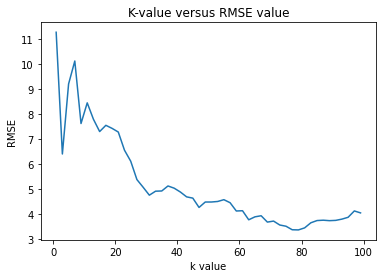

In [ ]:
x = list(range(1,100,2))
plt.plot(x, rmse)
plt.title('K-value versus RMSE value')
plt.xlabel('k value')
plt.ylabel('RMSE')

For k=79, let's obtain the predicted values. 

In [ ]:
Knn=KNeighborsRegressor(n_neighbors=79, metric='euclidean')
Knn.fit(X_train,y_train)
knn_y_prediction = Knn.predict(X_test)

knn_predictions_diff = pd.Series(knn_y_prediction, copy=True)
knn_predictions_diff_cumsum = knn_predictions_diff.cumsum()

last_price = train['Close'].iloc[-1] 
knn_price_diff_rev = []

for i in knn_predictions_diff_cumsum:
  pred = last_price + i
  knn_price_diff_rev.append(pred)

knn79_y_pred = np.array(knn_price_diff_rev) 

The evaluation metrics are calculated for that KNN model with k=79.

In [ ]:
print('MAE: ',metrics.mean_absolute_error(y_test, knn79_y_pred))
print('MSE: ',metrics.mean_squared_error(y_test, knn79_y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, knn79_y_pred)))

MAE:  2.356113538813175
MSE:  11.249146849539814
RMSE: 3.3539747836767964


The predicted and actual prices are plotted for comparison. 

Text(0, 0.5, 'Close Price')

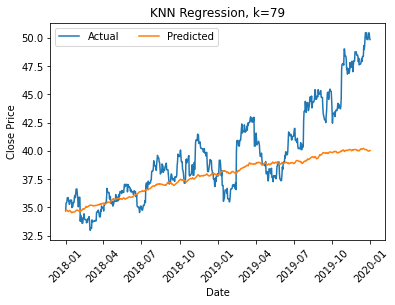

In [ ]:
knn_forecasted = pd.Series(knn79_y_pred, copy=True, index=test.index)
plt.plot(test['Close'], label='Actual')
plt.plot(knn_forecasted, label='Predicted')
plt.legend(ncol=2)
plt.xticks(rotation=45)
plt.title('KNN Regression, k=79')
plt.xlabel('Date')
plt.ylabel('Close Price')

**LSTM Model**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
import tensorflow as tf

In [ ]:
tf.random.set_seed(1111)

First, the technical indicators will be added to the dataframe using the Close price to create them. The technical indicators that will be added are: 
* simple moving average (SMA)
* moving average convergence divergence (MCAD)
* relative strength index (RSI) 
* Bollinger Bands (BB). 

In [ ]:
# downloading package for technical indicators 
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib

Simple moving average is a trend indicators. 

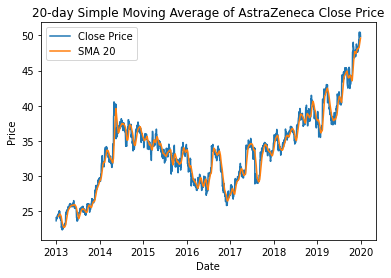

In [ ]:
df['SMA20'] = talib.SMA(df['Close'], timeperiod=20)

plt.plot(df['Close'], label='Close Price')
plt.plot(df['SMA20'], label='SMA 20')
plt.legend()
plt.title('20-day Simple Moving Average of AstraZeneca Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Moving average convergence difference is a momentum indicator. 

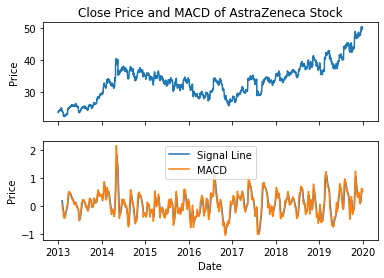

In [ ]:
df['macd'], df['macdsig'], df['macdhist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.set_ylabel('Price')
ax1.plot(df['Close'])
ax2.set_ylabel('MACD')
ax2.plot(df['macdsig'], label='Signal Line')
ax2.plot(df['macd'], label='MACD')
ax1.set_title('Close Price and MACD of AstraZeneca Stock')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Relative strength index is a momentum indicator. 

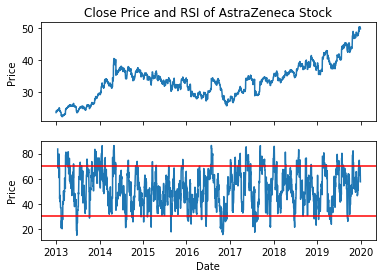

In [ ]:
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.set_ylabel('Price')
ax1.plot(df['Close'])
ax2.set_ylabel('RSI')
ax2.plot(df['RSI'])
ax2.axhline(y = 70, color = 'r', linestyle = '-')
ax2.axhline(y = 30, color = 'r', linestyle = '-')
ax1.set_title('Close Price and RSI of AstraZeneca Stock')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Bollinger bands is a volatility indicator. 

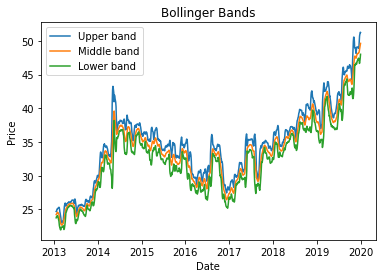

In [ ]:
df['upper'], df['mid'], df['lower'] = talib.BBANDS(df['Close'], nbdevup=2, nbdevdn=2, timeperiod=20)

plt.plot(df['upper'], label="Upper band")
plt.plot(df['mid'], label='Middle band')
plt.plot(df['lower'], label='Lower band')
plt.title('Bollinger Bands')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Now we can start coding our LSTM model. The baseline model will not use the techincal indicators as input data. 

In [ ]:
train_lstm1 = train.drop(['Close_log','Close_sqrt', 'Close_diff'],1)
train_lstm1.shape

(1825, 6)

In [ ]:
X_train = train_lstm1.drop('Close', 1)
X_test = test.drop('Close',1)

y_train = train_lstm1.loc[:,['Close']]
y_test = test.loc[:,['Close']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)
X_test = sc.fit_transform(X_test)
y_test = sc.fit_transform(y_test)

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1 ))

In [ ]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (1825, 5, 1)
y_train shape:  (1825, 1)
X_test shape:  (730, 5, 1)
y_test shape:  (730, 1)


In [ ]:
model = Sequential()
# layer 1
model.add(LSTM(units = 50, return_sequences = True,  input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# layer 2
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# layer 3
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# layer 4
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units = 1))

# Compiling the model
model.compile(optimizer = 'adam', loss = 'mse')

model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
58/58 [==============================] - 24s 13ms/step - loss: 0.1385
Epoch 2/50
58/58 [==============================] - 1s 14ms/step - loss: 0.0069
Epoch 3/50
58/58 [==============================] - 1s 14ms/step - loss: 0.0037
Epoch 4/50
58/58 [==============================] - 1s 14ms/step - loss: 0.0031
Epoch 5/50
58/58 [==============================] - 1s 14ms/step - loss: 0.0029
Epoch 6/50
58/58 [==============================] - 1s 14ms/step - loss: 0.0026
Epoch 7/50
58/58 [==============================] - 1s 14ms/step - loss: 0.0025
Epoch 8/50
58/58 [==============================] - 1s 14ms/step - loss: 0.0022
Epoch 9/50
58/58 [==============================] - 1s 14ms/step - loss: 0.0024
Epoch 10/50
58/58 [==============================] - 1s 14ms/step - loss: 0.0024
Epoch 11/50
58/58 [==============================] - 1s 14ms/step - loss: 0.0019
Epoch 12/50
58/58 [==============================] - 1s 14ms/step - loss: 0.0028
Epoch 13/50
58/58 [=================

In [ ]:
y_test = sc.inverse_transform(y_test)

The model is evaluated with MAE, MAPE, MSE and RMSE values. 

In [ ]:
lstm_y_pred = model.predict(X_test)
lstm_y_pred = sc.inverse_transform(lstm_y_pred)

mae_value = metrics.mean_absolute_error(y_test, lstm_y_pred)
mape_value = np.mean(np.abs((y_test - lstm_y_pred) / y_test)) * 100
mse_value = metrics.mean_squared_error(y_test, lstm_y_pred)
rmse_value = np.sqrt(metrics.mean_squared_error(y_test, lstm_y_pred))
print('Mean Absolute Error: ', mae_value)
print('Mean Absolute Percentage Error: ', mape_value)
print('Mean Square Error: ', mse_value)
print('Root Mean Square Error: ', rmse_value)

Mean Absolute Error:  0.3397204255404536
Mean Absolute Percentage Error:  0.8672852362882094
Mean Square Error:  0.1541077337925455
Root Mean Square Error:  0.39256557897062944


The predicted and actual close prices are plotted for comparison. 

Text(0, 0.5, 'Price')

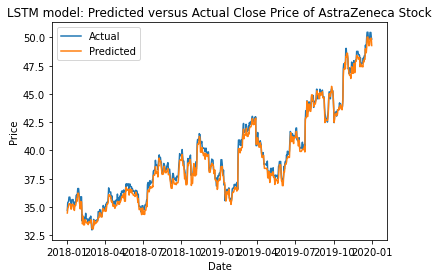

In [ ]:
  a = lstm_y_pred.flatten()
  forecasted = pd.Series(a, copy=True, index=test.index)
  plt.plot(test['Close'], label='Actual')
  plt.plot(forecasted, label='Predicted')
  plt.legend()
  plt.title('LSTM model: Predicted versus Actual Close Price of AstraZeneca Stock')
  plt.xlabel('Date')
  plt.ylabel('Price')

Now, we will train an LSTM model again, using the technical indicators as input along with the stock attributes. 

In [ ]:
df2 = df.copy()
df2.shape

(2556, 14)

In [ ]:
train_lstm2 = df2.iloc[:-730,:]
test_lstm2 = df2.iloc[-730:,:]

In [ ]:
train_lstm2 = train_lstm2.fillna(0)
test_lstm2 = test_lstm2.fillna(0)

In [ ]:
X_train = train_lstm2.drop('Close', 1)
X_test = test_lstm2.drop('Close',1)

y_train = train_lstm2.loc[:,['Close']]
y_test = test_lstm2.loc[:,['Close']]

In [ ]:
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)
X_test = sc.fit_transform(X_test)
y_test = sc.fit_transform(y_test)

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1 ))

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (1826, 13, 1)
y_train shape:  (1826, 1)
X_test shape:  (730, 13, 1)
y_test shape:  (730, 1)


In [ ]:
model2 = Sequential()
# layer 1
model2.add(LSTM(units = 50, return_sequences = True,  input_shape = (X_train.shape[1], 1)))
model2.add(Dropout(0.2))

# layer 2
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))

# layer 3
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))

# layer 4
model2.add(LSTM(units = 50))
model2.add(Dropout(0.2))

# output layer
model2.add(Dense(units = 1))

# Compiling the model
model2.compile(optimizer = 'adam', loss = 'mse')

model2.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
58/58 [==============================] - 10s 28ms/step - loss: 0.0997
Epoch 2/50
58/58 [==============================] - 2s 29ms/step - loss: 0.0066
Epoch 3/50
58/58 [==============================] - 2s 28ms/step - loss: 0.0045
Epoch 4/50
58/58 [==============================] - 2s 28ms/step - loss: 0.0038
Epoch 5/50
58/58 [==============================] - 2s 29ms/step - loss: 0.0035
Epoch 6/50
58/58 [==============================] - 2s 29ms/step - loss: 0.0031
Epoch 7/50
58/58 [==============================] - 2s 28ms/step - loss: 0.0030
Epoch 8/50
58/58 [==============================] - 2s 28ms/step - loss: 0.0029
Epoch 9/50
58/58 [==============================] - 2s 29ms/step - loss: 0.0028
Epoch 10/50
58/58 [==============================] - 2s 28ms/step - loss: 0.0025
Epoch 11/50
58/58 [==============================] - 2s 29ms/step - loss: 0.0024
Epoch 12/50
58/58 [==============================] - 2s 28ms/step - loss: 0.0024
Epoch 13/50
58/58 [=================

In [ ]:
y_test = sc.inverse_transform(y_test)

The model is evaluated with MAE, MAPE, MSE and RMSE values. 

In [ ]:
lstm_y_pred = model2.predict(X_test)
lstm_y_pred = sc.inverse_transform(lstm_y_pred)

mae_value = metrics.mean_absolute_error(y_test, lstm_y_pred)
mape_value = np.mean(np.abs((y_test - lstm_y_pred) / y_test)) * 100
mse_value = metrics.mean_squared_error(y_test, lstm_y_pred)
rmse_value = np.sqrt(metrics.mean_squared_error(y_test, lstm_y_pred))
print('Mean Absolute Error: ', mae_value)
print('Mean Absolute Percentage Error: ', mape_value)
print('Mean Square Error: ', mse_value)
print('Root Mean Square Error: ', rmse_value)

Mean Absolute Error:  0.5520445941245716
Mean Absolute Percentage Error:  1.4312901038021753
Mean Square Error:  0.36998244208097913
Root Mean Square Error:  0.6082618203380672


The predicted and actual close prices are plotted for comparison. 

Text(0, 0.5, 'Price')

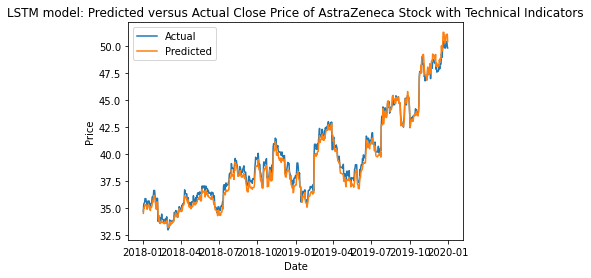

In [ ]:
  a = lstm_y_pred.flatten()
  forecasted = pd.Series(a, copy=True, index=test.index)
  plt.plot(test['Close'], label='Actual')
  plt.plot(forecasted, label='Predicted')
  plt.legend()
  plt.title('LSTM model: Predicted versus Actual Close Price of AstraZeneca Stock with Technical Indicators')
  plt.xlabel('Date')
  plt.ylabel('Price')

This concludes the stock market analysis and forecasting project for AstraZeneca!